In [128]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy import stats
import os

cwd = os.getcwd()
if cwd[-5:] != "Lab_3":
    os.chdir("/Users/efrainmartinez/Downloads/SBU/SBU_Spring_2024_Semester/AST443/Labs/AST_443/Lab_3")

In [129]:
# Importing the dark frames that were taken for Merak

merak_dark_prefix = "lab_3_dark_5_min.0000000"
merak_dark_suffix = ".DARK.FIT"
merak_dark_data = []
merak_start = 0
merak_end = 4

for i in range(merak_start, merak_end+1, 1):
    filename = merak_dark_prefix + str(i) + merak_dark_suffix
    list = fits.open('calibration_images/'+filename)
    image_data = list[0].data
    merak_dark_data.append(image_data)
        
# Importing the dark frames that were taken for the galaxies (same exposure times)        
gal_dark_prefix = "lab_3_dark_25_min.0000000"
gal_dark_suffix = ".DARK.FIT"
gal_dark_data = []
gal_start = 0
gal_end = 1

for i in range(gal_start, gal_end+1, 1):
    filename = gal_dark_prefix + str(i) + gal_dark_suffix
    list = fits.open('calibration_images/'+filename)
    image_data = list[0].data
    gal_dark_data.append(image_data)
        
# lamp_data = []
# with fits.open('calibration_images/lab_3_ne_lamp.00000000.FIT') as file:
#     plt.imshow(file[0].data, cmap='gray', vmax=9000)
#     plt.colorbar()
#     lamp_data.append(file[0].data)
    
    
# Importing the flat fields that were taken for our observations (same for all)
flat_prefix = "lab_3_flat_2_min.0000000"
flat_suffix = ".FIT"
flat_data = []
flat_start = 0
flat_end = 3

for i in range(flat_start, flat_end+1, 1):
    ind = str(i)
    filename = flat_prefix + str(i) + flat_suffix
#     list = fits.open('flat_fields/'+filename)           -------------------- UNCOMMENT THIS
    list = fits.open('calibration_images/'+filename)#           -------------------- DELETE THIS
    image_data = list[0].data
    flat_data.append(image_data)

In [130]:
# Calculating the master dark frames for Merak and the Galaxies
merak_master_dark = np.median(merak_dark_data, axis=0)
gal_master_dark = np.median(gal_dark_data, axis=0)

In [131]:
names = ["lab_3_merak_2_mins.0000000", "lab_3_m51_20_min.0000000", "lab_3_m82_25_mins.0000000", "lab_3_ne_lamp.0000000", "lab_3_empty_25_mins.0000000"]
image_names = ["merak_images", "m51_images", "m82_images", "calibration_images", "calibration_images"]

starts = [0, 0, 0, 0, 3]#           -------------------- CORRECT THIS
ends = [4, 3, 2, 0, 5]#           -------------------- CORRECT THIS
image_end = ".FIT"
melark_data = []
m51_data = []
m82_data = []
lamp_data = []
sky_data = []
total_data = [melark_data, m51_data, m82_data, lamp_data, sky_data]

j = 0
for image_prefix in names:
    for i in range(starts[j], ends[j]+1, 1):
        if image_prefix == "lab_3_m51_20_min.0000000" and i>0:
            image_prefix = "lab_3_m51_25_min.0000000"
        filename = image_prefix + str(i) + image_end
        list = fits.open(image_names[j]+"/"+filename)
        image_data = list[0].data
        total_data[j].append(image_data)
    j += 1
print(len(total_data[3]))

1


In [132]:
calib_totals = []
merak_final = []
m51_final = []
m82_final = []
lamp_final = []
sky_final = []

for i in range(0, len(total_data[0])):
    calib_totals.append(total_data[0][i]-merak_master_dark)
for j in range(1, 5):
    for i in range(0, len(total_data[j])):
        if j == 3:
            calib_totals.append(total_data[j][i]-merak_master_dark)
        else:
            calib_totals.append(total_data[j][i]-gal_master_dark)

merak_final = calib_totals[0:5]
m51_final = calib_totals[5:9]
m82_final = calib_totals[9:12]
lamp_final = calib_totals[12:13]
sky_final = calib_totals[13:]
flat_final = flat_data - merak_master_dark

sky_median = [np.median(sky_final, axis=0)]
sky_mean = [np.mean(sky_final, axis=0)]

merak_final_med = [merak_final[x] - (sky_median[0])/12.5 for x in range(0, len(merak_final))]
merak_final_mean = [merak_final[x] - (sky_mean[0])/12.5 for x in range(0, len(merak_final))]
m51_final_med = [m51_final[x] - sky_median for x in range(0, len(m51_final))]
m51_final_mean = [m51_final[x] - sky_mean for x in range(0, len(m51_final))]
m82_final_med = [m82_final[x] - sky_median for x in range(0, len(m82_final))]
m82_final_mean = [m82_final[x] - sky_mean for x in range(0, len(m82_final))]

In [133]:
cwd = os.getcwd()
print(cwd)
if cwd[-25:] != "calibrated_fits_files":
    os.chdir("/Users/efrainmartinez/Downloads/SBU/SBU_Spring_2024_Semester/AST443/Labs/AST_443/Lab_3/calibrated_fits_files")
    cwd = os.getcwd()
print(cwd)
target_names = ["merak_med.00", "merak_mean.00", "m51_med.00", "m51_mean.00", "m82_med.00", "m82_mean.00", "neon.00", "sky.00", "sky_med.00", "sky_mean.00", "flat.00"]
data = [merak_final_med, merak_final_mean, m51_final_med, m51_final_mean, m82_final_med, m82_final_mean, lamp_final, sky_final, sky_median, sky_mean, flat_data]
j=0
if os.path.exists("merak_med.000.FIT") == True:
    for image_prefix in target_names:
        image_suffix = ".FIT"
        for i in range(0, len(data[j])):
            hdu = fits.PrimaryHDU(data[j][i])
            filename = image_prefix + str(i) + image_suffix
            hdu.writeto(filename, overwrite=True)
        j += 1

/Users/efrainmartinez/Downloads/SBU/SBU_Spring_2024_Semester/AST443/Labs/AST_443/Lab_3
/Users/efrainmartinez/Downloads/SBU/SBU_Spring_2024_Semester/AST443/Labs/AST_443/Lab_3/calibrated_fits_files


In [134]:
# with fits.open("neon.000.FIT") as file:
#     image_data = file[0].data
#     plt.imshow(image_data, cmap='gray', vmax=9000)
#     plt.colorbar()

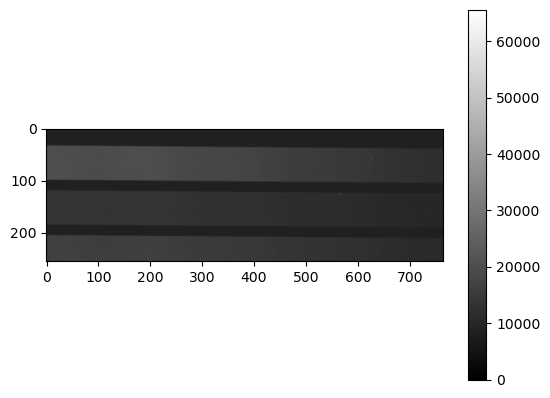

In [138]:
plt.imshow(flat_data[0], cmap='gray', vmin=0)
plt.colorbar()